In [0]:
# reference: https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e

!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xvzf 101_ObjectCategories.tar.gz

--2019-03-12 11:48:32--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131740031 (126M) [application/x-tar]
Saving to: ‘101_ObjectCategories.tar.gz.1’

101_ObjectCategorie 100%[===================>] 125.64M  4.66MB/s    in 29s     

2019-03-12 11:49:02 (4.37 MB/s) - ‘101_ObjectCategories.tar.gz.1’ saved [131740031/131740031]

101_ObjectCategories/
101_ObjectCategories/BACKGROUND_Google/
101_ObjectCategories/BACKGROUND_Google/tmp
101_ObjectCategories/BACKGROUND_Google/image_0004.jpg
101_ObjectCategories/BACKGROUND_Google/image_0005.jpg
101_ObjectCategories/BACKGROUND_Google/image_0006.jpg
101_ObjectCategories/BACKGROUND_Google/image_0007.jpg
101_ObjectCategories/BACKGROUND_Google/image_0008.jpg
101_ObjectCategories/BACKGROUND_Googl

In [0]:
from fastai import *
from fastai.vision import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# define batch size
bs = 32

In [0]:
# define Path
path_img = Path('101_ObjectCategories/')

In [0]:
# create directories
import os
os.makedirs("101_ObjectCategories/train")
os.makedirs("101_ObjectCategories/valid")

In [0]:
def get_immediate_subdirectories(data_directory):
    return [name for name in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory, name))]


In [0]:
import numpy as np
import glob
import shutil

def move_images(directory, train_dir, valid_dir, image_list, label):
  # shuffle all images
  random_set = np.random.permutation(len(image_list))
  
  # select 80% of images at random for train
  train_list = random_set[:round(len(random_set) * 0.8)]
  
  # select 20% of images at randomf or valid
  valid_list = random_set[-(len(image_list) - len(train_list))::]
  
  train_images = []
  valid_images = []
  
  for index in train_list:
    train_images.append(image_list[index])
  
  for index in valid_list:
    valid_images.append(image_list[index])
  
  for train_image in train_images:
    os.rename(os.path.join(directory, label, train_image), os.path.join(train_dir, label, train_image))
  for valid_image in valid_images:
    os.rename(os.path.join(directory, label, valid_image), os.path.join(valid_dir, label, valid_image))
  
  shutil.rmtree(os.path.join(directory, label))
    
#   os.removedirs(os.path.join(directory, label))

In [0]:
# !rm -r 101_ObjectCategories/
# !tar -xvzf 101_ObjectCategories.tar.gz
# reference: https://gist.github.com/GertjanBrouwer/95c815565d3d8788137929ef27054db9

train_dir = "101_ObjectCategories/train/"
valid_dir = "101_ObjectCategories/valid/"

dir_list = get_immediate_subdirectories("101_ObjectCategories/")
directory = "101_ObjectCategories/"

# os.mkdir(train_dir)
# os.mkdir(valid_dir)

for dir_ in dir_list:
  if dir_ == "train" or dir_ == "valid":
    continue
    
  label = dir_
  
  print('Started moving: ' + str(label))
  
  image_list = [os.path.basename(x) for x in glob.glob(os.path.join(directory, label) + '/*.jpg')]
  
  if not os.path.exists(os.path.join(train_dir, label)):
    os.mkdir(os.path.join(train_dir, label))
  
  if not os.path.exists(os.path.join(valid_dir, label)):
    os.mkdir(os.path.join(valid_dir, label))
  
  directory = "101_ObjectCategories/"
  
  move_images(directory, train_dir, valid_dir, image_list, label)
  
  print("Finished moving: " + str(label))

Started moving: camera
Finished moving: camera
Started moving: laptop
Finished moving: laptop
Started moving: octopus
Finished moving: octopus
Started moving: strawberry
Finished moving: strawberry
Started moving: butterfly
Finished moving: butterfly
Started moving: Leopards
Finished moving: Leopards
Started moving: ceiling_fan
Finished moving: ceiling_fan
Started moving: inline_skate
Finished moving: inline_skate
Started moving: bonsai
Finished moving: bonsai
Started moving: soccer_ball
Finished moving: soccer_ball
Started moving: watch
Finished moving: watch
Started moving: kangaroo
Finished moving: kangaroo
Started moving: ant
Finished moving: ant
Started moving: emu
Finished moving: emu
Started moving: beaver
Finished moving: beaver
Started moving: dragonfly
Finished moving: dragonfly
Started moving: ibis
Finished moving: ibis
Started moving: metronome
Finished moving: metronome
Started moving: dolphin
Finished moving: dolphin
Started moving: pyramid
Finished moving: pyramid
Starte

In [0]:
# load data
data = ImageDataBunch.from_folder(path=path_img, ds_tfms=get_transforms(), size=224, bs=bs, train="train", valid="valid")

In [0]:
data

ImageDataBunch;

Train: LabelList (7315 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
camera,camera,camera,camera,camera
Path: 101_ObjectCategories;

Valid: LabelList (1829 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
camera,camera,camera,camera,camera
Path: 101_ObjectCategories;

Test: None

ImageDataBunch;

Train: LabelList (7315 items)
x: ImageList
Image (3, 300, 287),Image (3, 230, 300),Image (3, 300, 274),Image (3, 300, 295),Image (3, 191, 300)
y: CategoryList
camera,camera,camera,camera,camera
Path: 101_ObjectCategories;

Valid: LabelList (1829 items)
x: ImageList
Image (3, 300, 271),Image (3, 226, 300),Image (3, 265, 300),Image (3, 226, 300),Image (3, 248, 300)
y: CategoryList
camera,camera,camera,camera,camera
Path: 101_ObjectCategories;

Test: None

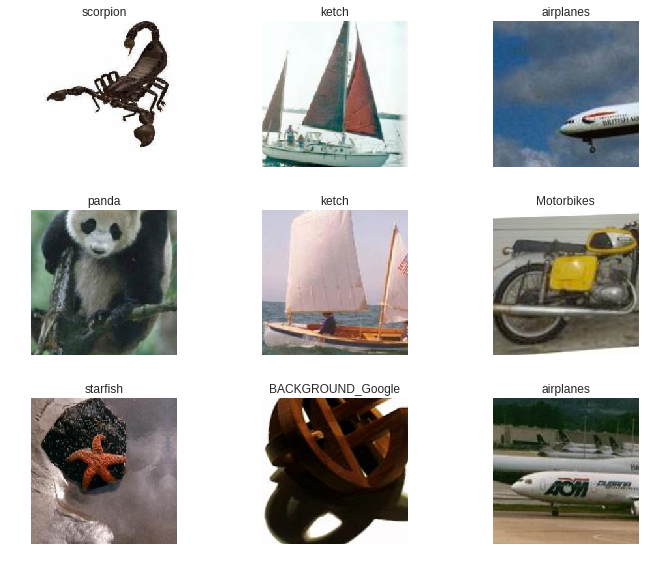

In [0]:
data.show_batch(rows=3, figsize=(10,8))

In [0]:
print(data.classes)
len(data.classes), data.c

['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

(102, 102)

In [0]:
# transfer learning
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 91277748.17it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
1,1.019286,0.520993,0.134500,02:29
2,0.558241,0.382537,0.119191,02:20
3,0.383340,0.298620,0.089120,02:19
4,0.224699,0.230644,0.063423,02:20
5,0.155586,0.228949,0.063969,02:20


In [0]:
learn.save('stage1')

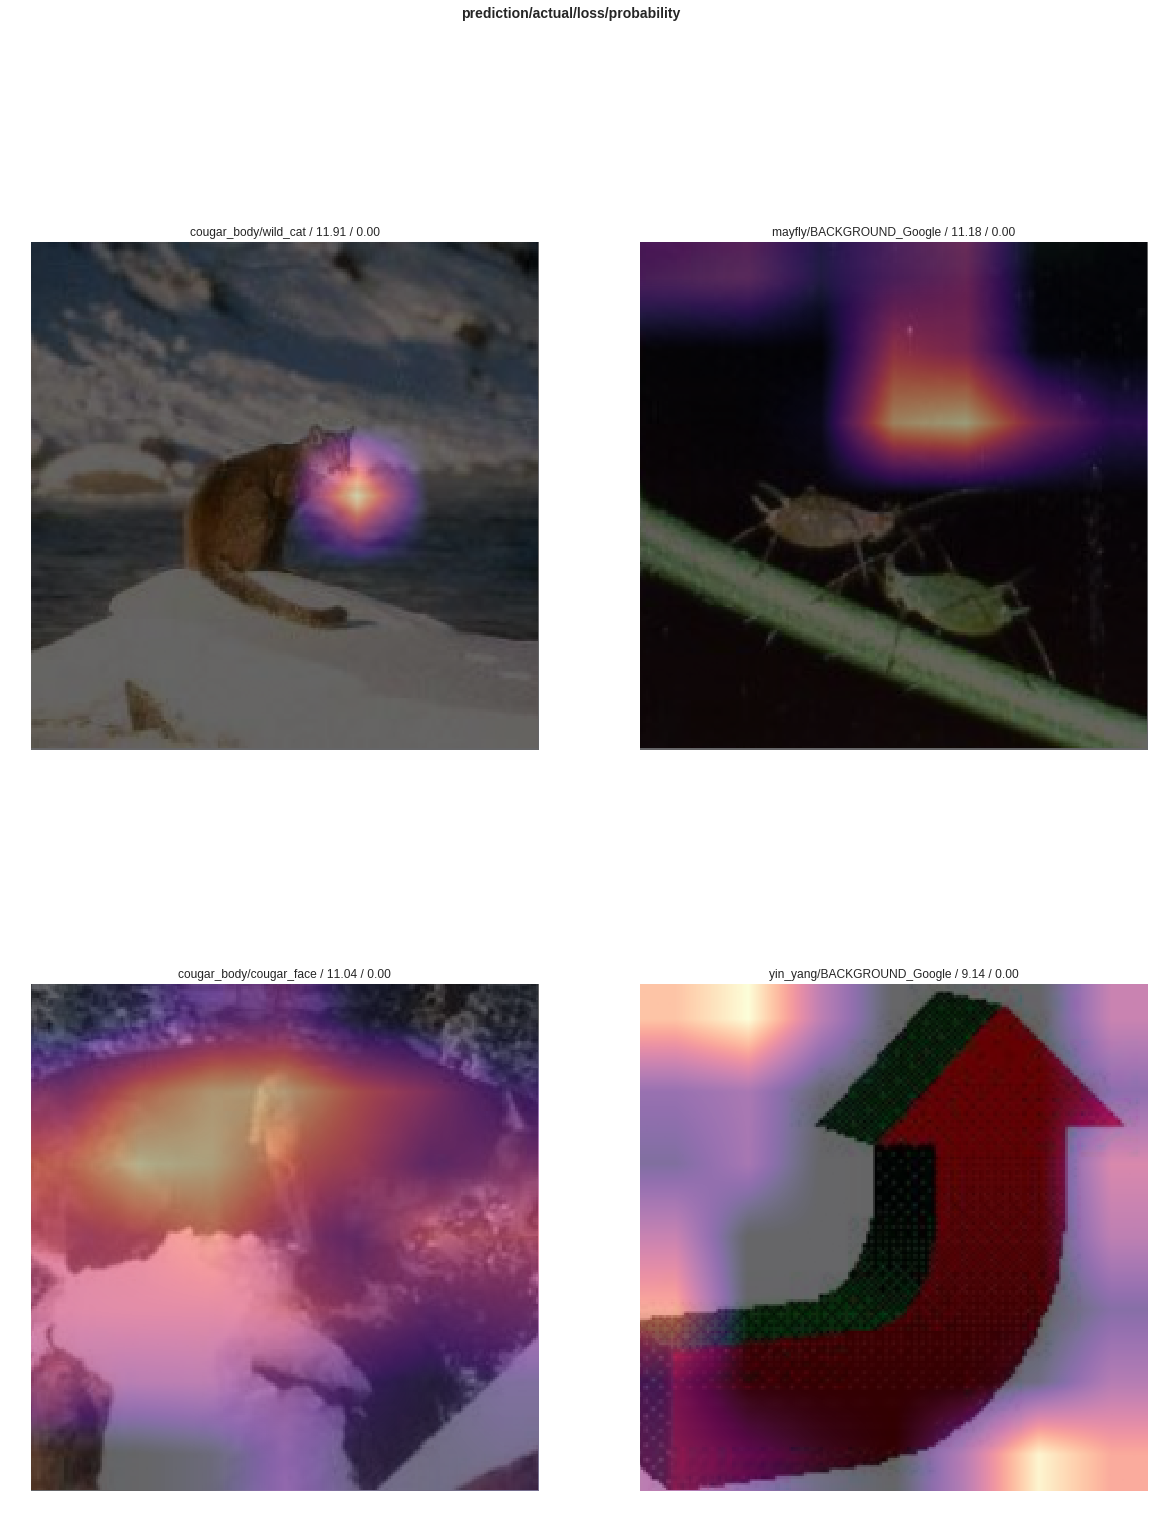

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,25))

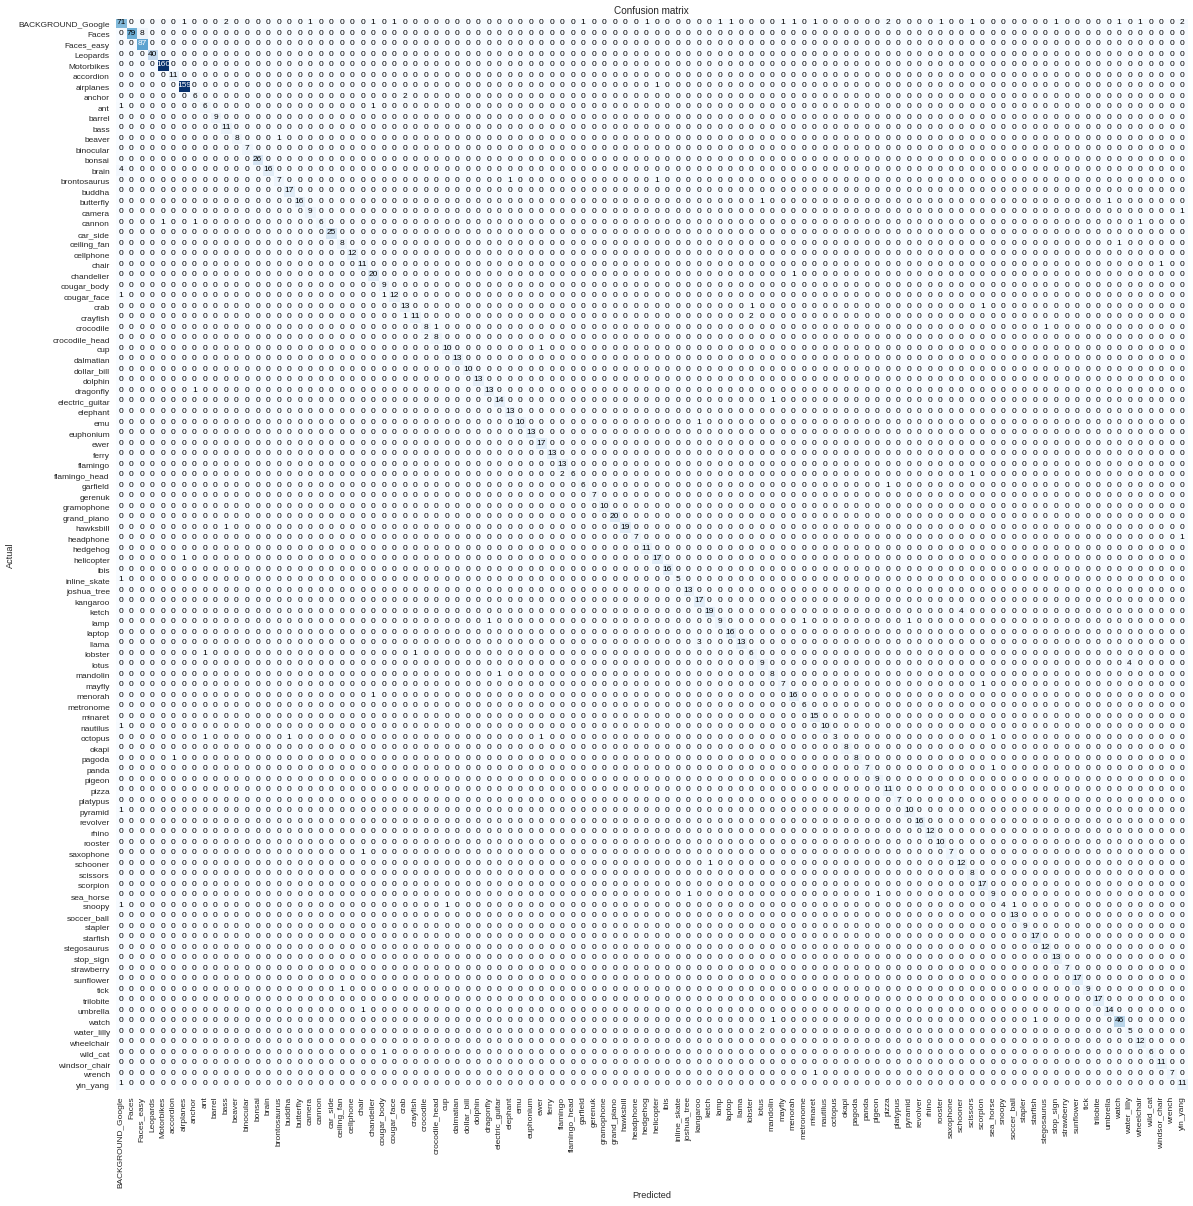

In [0]:
# confusion matrix
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


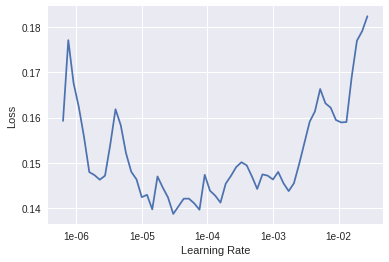

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.167863,0.242714,0.061236,03:05
2,0.138641,0.214606,0.062329,03:03
